#### Developer: Mostafa Allahmoradi
#### Course: CSCN8010 - Machine Learning
#### Date: December 2025

#### Setup and Imports

In [1]:
import os
import sys

# --- PATH SETUP ---
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '../..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.prediction.estimator import EnergyEstimator



#### Initialize the Estimator

In [2]:
# Example input parameters
prompt = "Write a detailed explanation about neural networks and transformers."
layers = 12
training_hours = 5
flops = "2.5e18"

# Initialize estimators - Random Forest and Linear Regression
estimator_random_forest = EnergyEstimator(model_type="RandomForest")
print("Trained Random Forest Model Metrics:", estimator_random_forest.metrics)

# Estimate energy consumption using Random Forest estimator
results_random_forest = estimator_random_forest.estimate(prompt, layers=layers, training_hours=training_hours, flops_str=flops)

print("Random Forest Estimation Results:", results_random_forest)

# Extract predicted energy for plotting
predicted_energy = results_random_forest['energy_kwh']


Model loaded from c:\Users\MOSTAFA\Desktop\Foundations of ML Frameworks\Final Project\Project\Sustainable_AI_G3-\model\energy_predictor\energy_model_RandomForest.pkl
Trained Random Forest Model Metrics: {'mse': 0.04414893567422252, 'r2': 0.9839891260249741}
Random Forest Estimation Results: {'energy_kwh': np.float64(1.2198), 'carbon_kg': np.float64(0.5794), 'suggestion': '✅ Optimized.', 'token_count': 9, 'predicted_val': np.float64(1.2198200787243256)}


#### Plot Training Results

Data split into 79939 training and 19985 testing samples.


C:\Users\MOSTAFA\AppData\Local\Temp\ipykernel_19792\3450758378.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


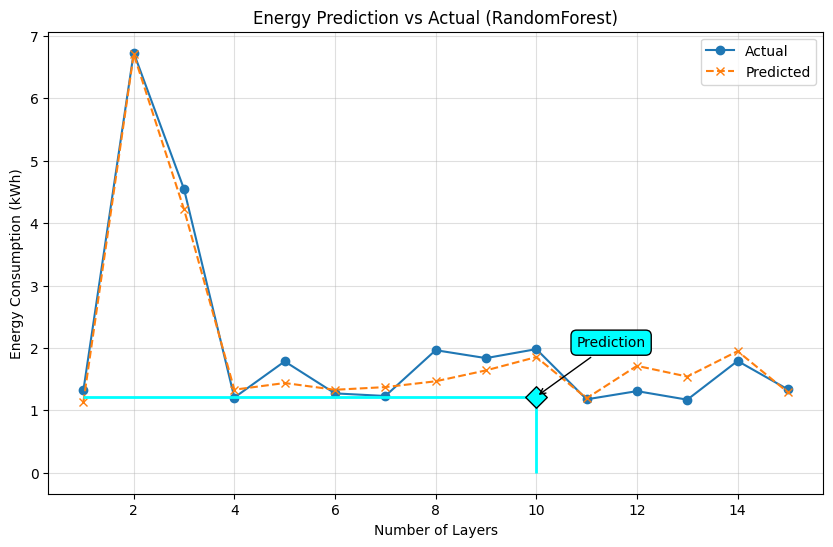

In [3]:
# Generate and display training plot for Random Forest estimator
fig = estimator_random_forest.get_training_plot(10, predicted_energy)
fig.show()

#### Run Anomaly Detection

In [4]:
param = {
    "num_layers": 50,
    "training_hours": 999,
    "flops_per_hour": 500,
    "token_count": 40000,
    "avg_word_length": 8
}
estimator_random_forest.detect_anomaly(param)

{'is_anomaly': True, 'status': 'ANOMALY DETECTED'}

In [5]:
# Initialize Linear Regression estimator
estimator_linear_regression = EnergyEstimator(model_type="LinearRegression")
print("Trained Linear Regression Model Metrics:", estimator_linear_regression.metrics)

# Estimate energy consumption using Linear Regression estimator
results_linear_regression = estimator_linear_regression.estimate(prompt, layers=layers, training_hours=training_hours, flops_str=flops)

print("Linear Regression Estimation Results:", results_linear_regression)

# Extract predicted energy for plotting
predicted_energy = results_linear_regression['energy_kwh']

print("Predicted Energy (kWh):", predicted_energy)


Model loaded from c:\Users\MOSTAFA\Desktop\Foundations of ML Frameworks\Final Project\Project\Sustainable_AI_G3-\model\energy_predictor\energy_model_LinearRegression.pkl
Trained Linear Regression Model Metrics: {'mse': 0.26940335666078075, 'r2': 0.9022992711812261}
Linear Regression Estimation Results: {'energy_kwh': np.float64(0.8449), 'carbon_kg': np.float64(0.4013), 'suggestion': '✅ Optimized.', 'token_count': 9, 'predicted_val': np.float64(0.8449151882157536)}
Predicted Energy (kWh): 0.8449


#### Plot Training Results

Data split into 79939 training and 19985 testing samples.


C:\Users\MOSTAFA\AppData\Local\Temp\ipykernel_19792\122663260.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


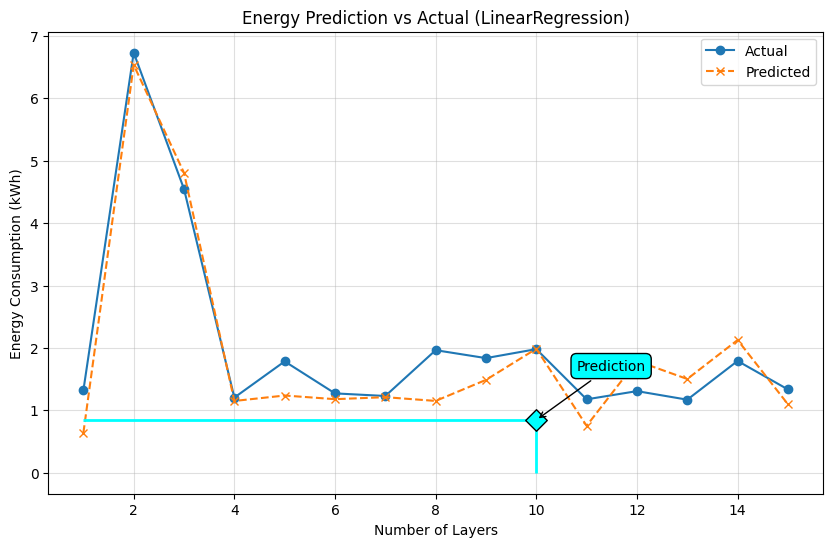

In [6]:
# Generate and display training plot for Linear Regression estimator
fig = estimator_linear_regression.get_training_plot(10, predicted_energy)
fig.show()

#### Run Anomaly Detection

In [7]:
param = {
    "num_layers": 50,
    "training_hours": 999,
    "flops_per_hour": 500,
    "token_count": 40000,
    "avg_word_length": 8
}
estimator_linear_regression.detect_anomaly(param)

{'is_anomaly': True, 'status': 'ANOMALY DETECTED'}